In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
file_path = 'path/to/data_analysis' #------------------change path to data_analysis dir here-------------!

years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'] #!--------------------------------set desired years--------------------------!

df_years = []

#csvs tab seperated!
for year in years:
    df_years.append(pd.read_csv(file_path+f'/results/result_comments_{year}_preproc.csv', sep='\t'))

df_total = pd.read_csv(file_path+f'/results/result_comments_total_preproc.csv', sep='\t')

#set of subreddits that appear in all years
subreddits = set(df_years[0]['subreddit'])
removed_subreddits = set()

#remove subreddits if there arent enough comments
#for subreddit in subreddits:
#    if df_years[0].loc[df_years[0]['subreddit'] == subreddit, 'n_comments'].iloc[0] < 334:
 #       removed_subreddits.add(subreddit)

#remove subreddits if they dont appear in all years
for i in range(1, len(years)):
    for subreddit in subreddits:
        if subreddit not in set(df_years[i]['subreddit']):
            removed_subreddits.add(subreddit)
            continue

subreddits -= removed_subreddits

print(subreddits)
print(removed_subreddits)

#filter subreddits that dont appear in all years
for i in range(len(years)):
    df_years[i] = df_years[i][df_years[i]['subreddit'].isin(subreddits)]
df_total = df_total[df_total['subreddit'].isin(subreddits)]

print(df_total['subreddit'].head(5).tolist())

{'ukpolitics', 'USNEWS', 'AmericanPolitics', 'ronpaul', 'Libertarian', 'censorship', 'NonAustrianEconomics', 'revolution', 'Marxism', 'Anarcho_Capitalism', 'antiwar', 'government', 'politics', 'Conservative', 'Capitalism', 'Israel', 'Economics', 'Anarchism', 'geopolitics', 'economy', 'worldpolitics', 'Freethought', 'law', 'Objectivism', 'PoliticalPhilosophy', 'socialism', 'progressive', 'obama', 'PoliticalHumor'}
{'Hillary', 'BritishPolitics', 'propaganda'}
['politics', 'ukpolitics', 'Libertarian', 'PoliticalHumor', 'Conservative']


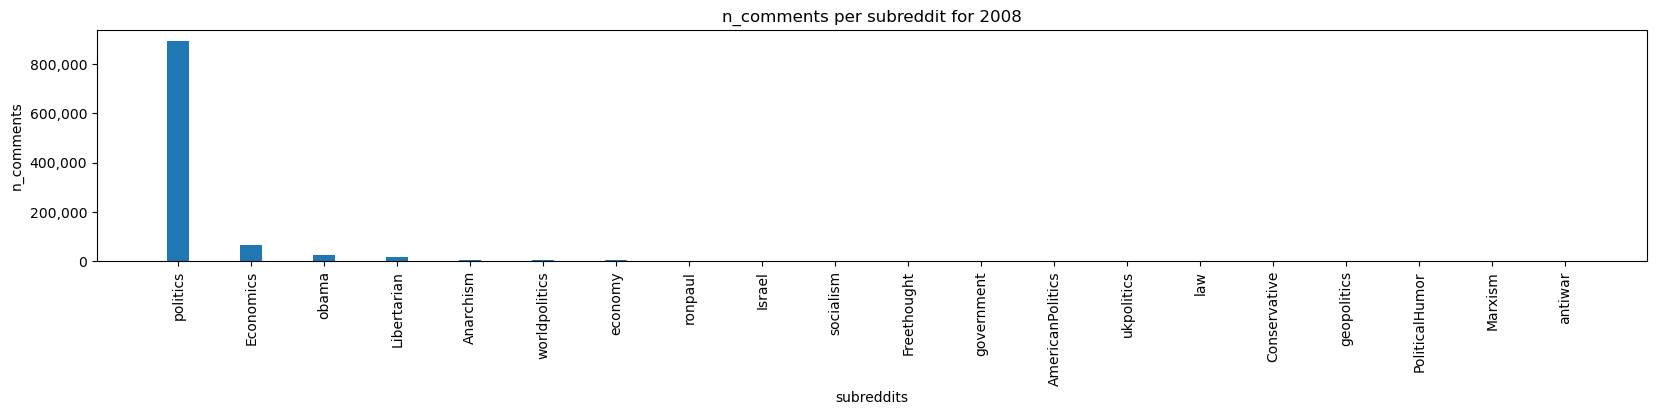

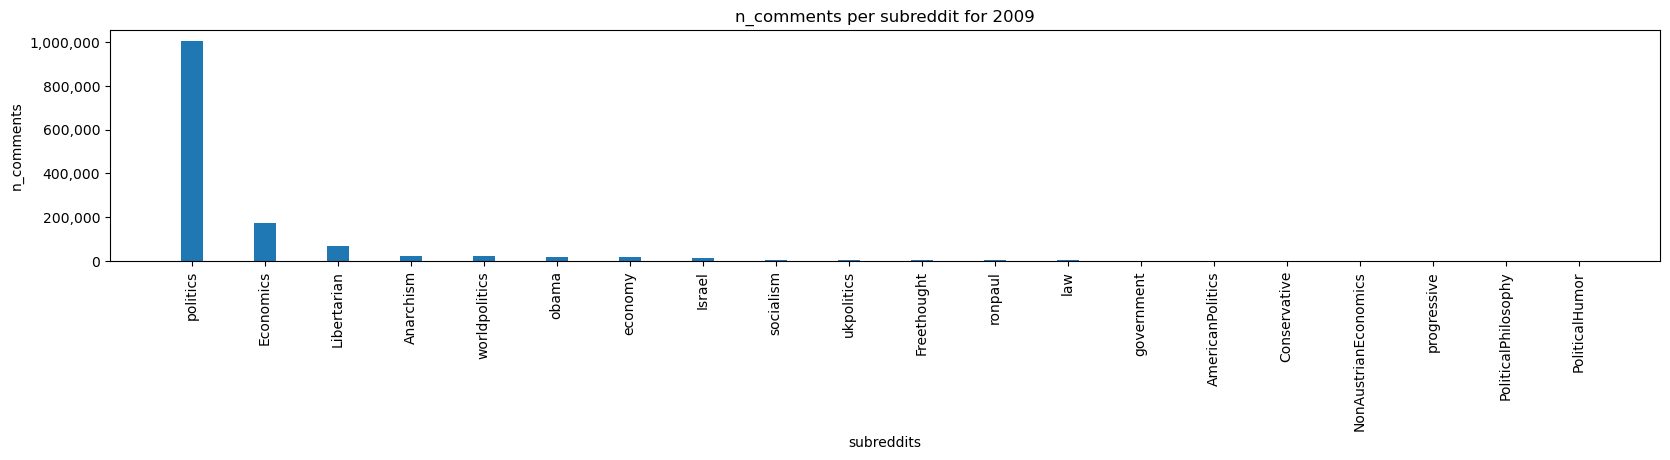

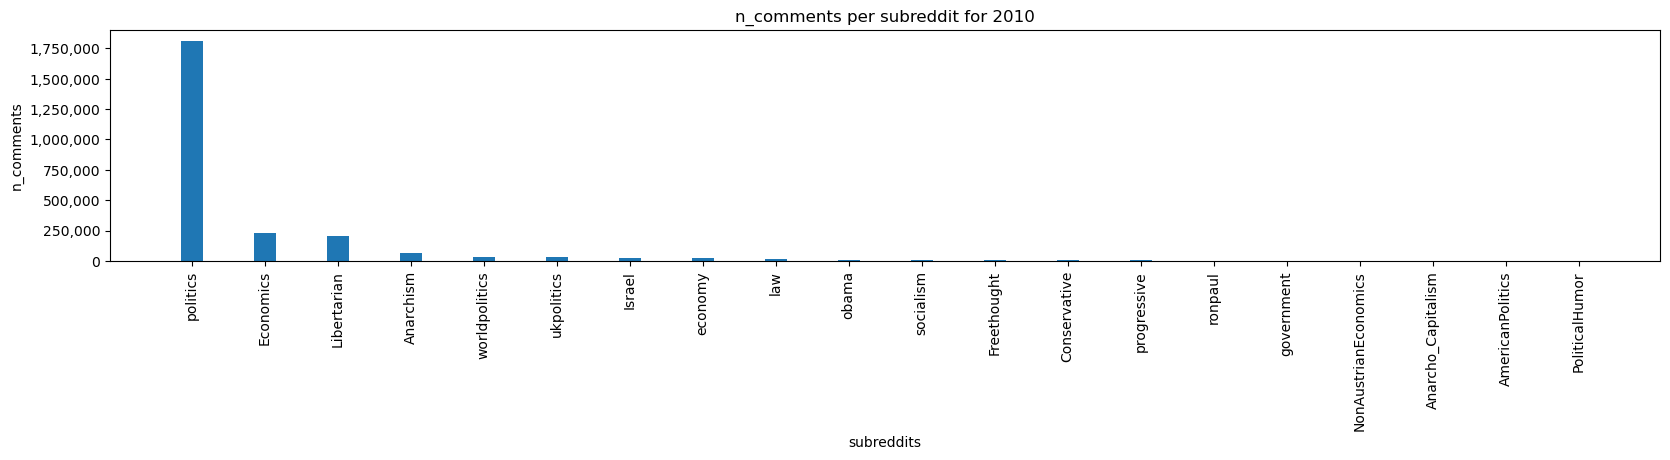

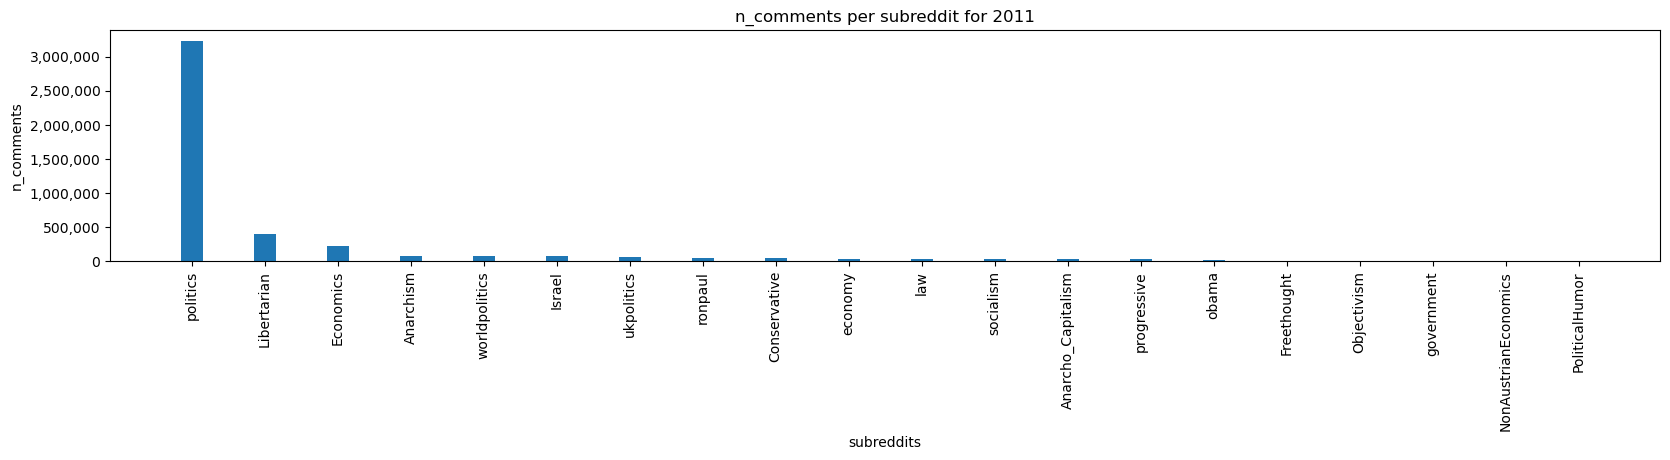

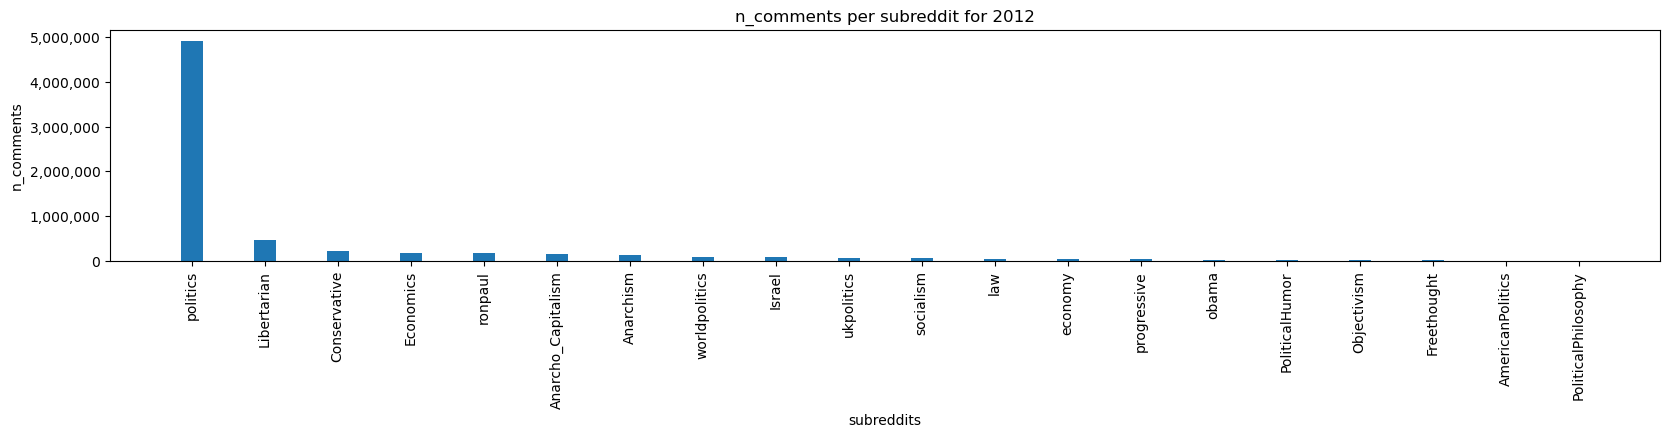

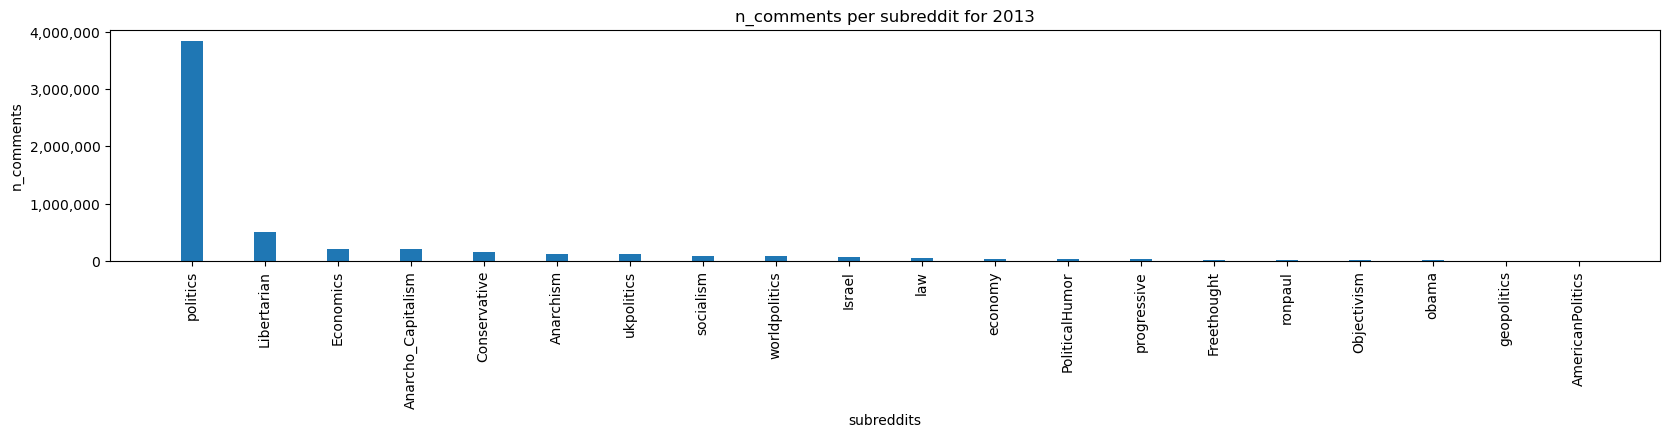

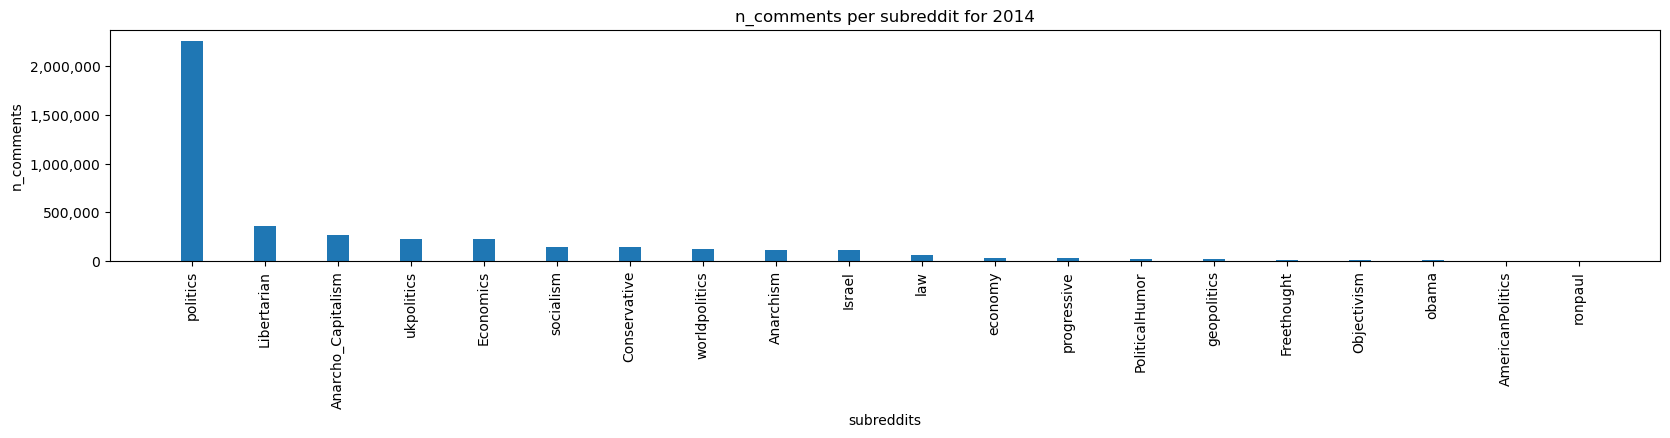

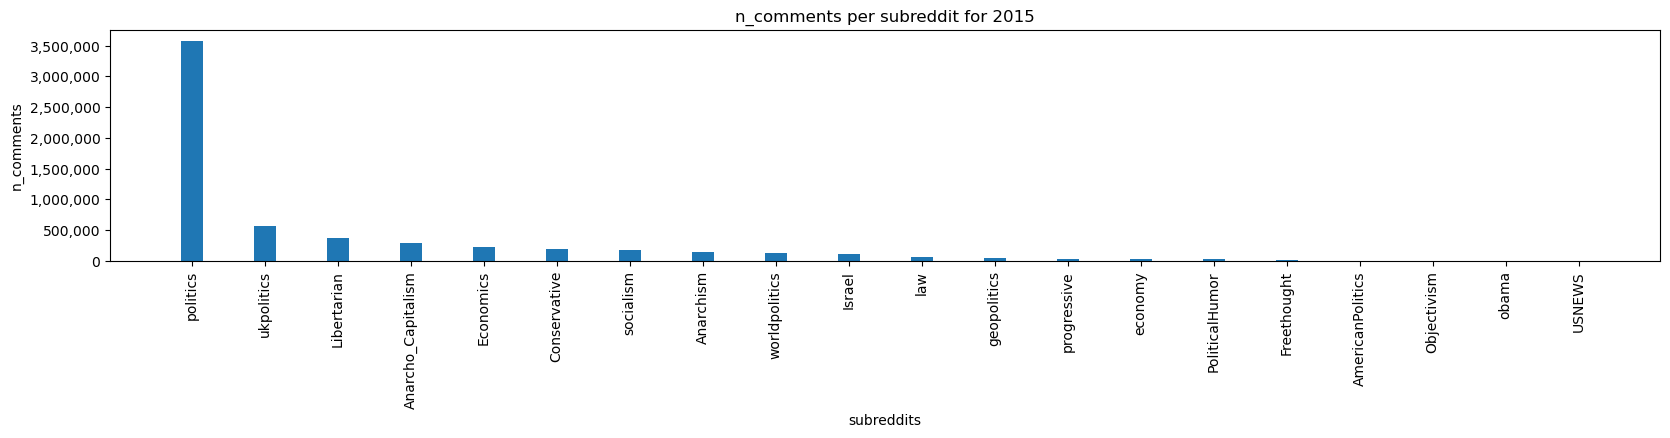

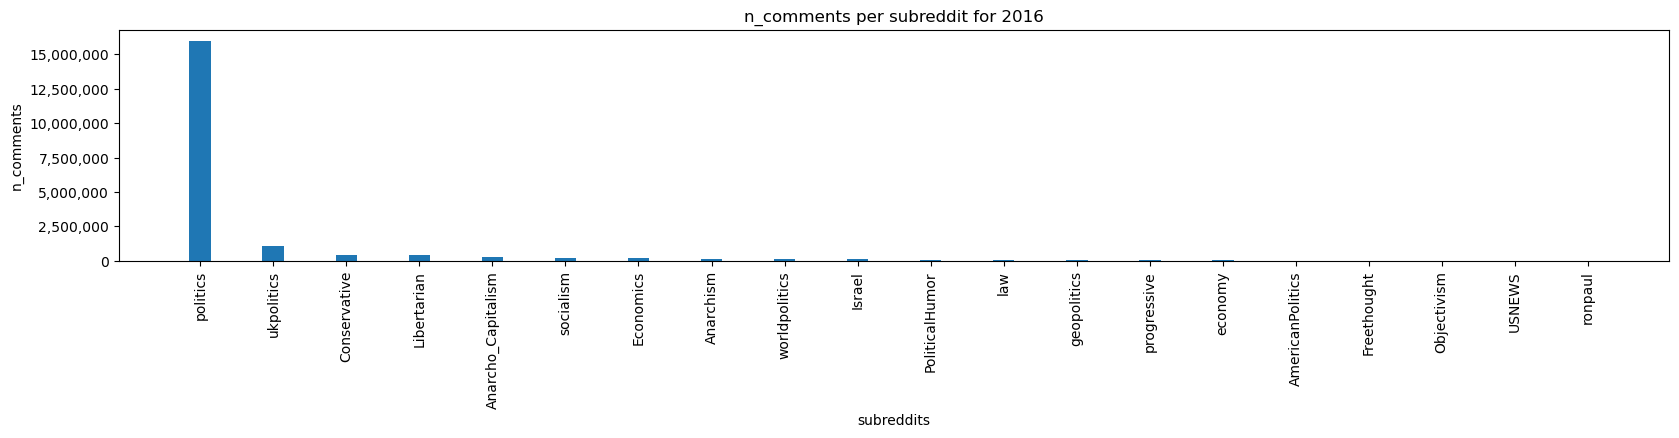

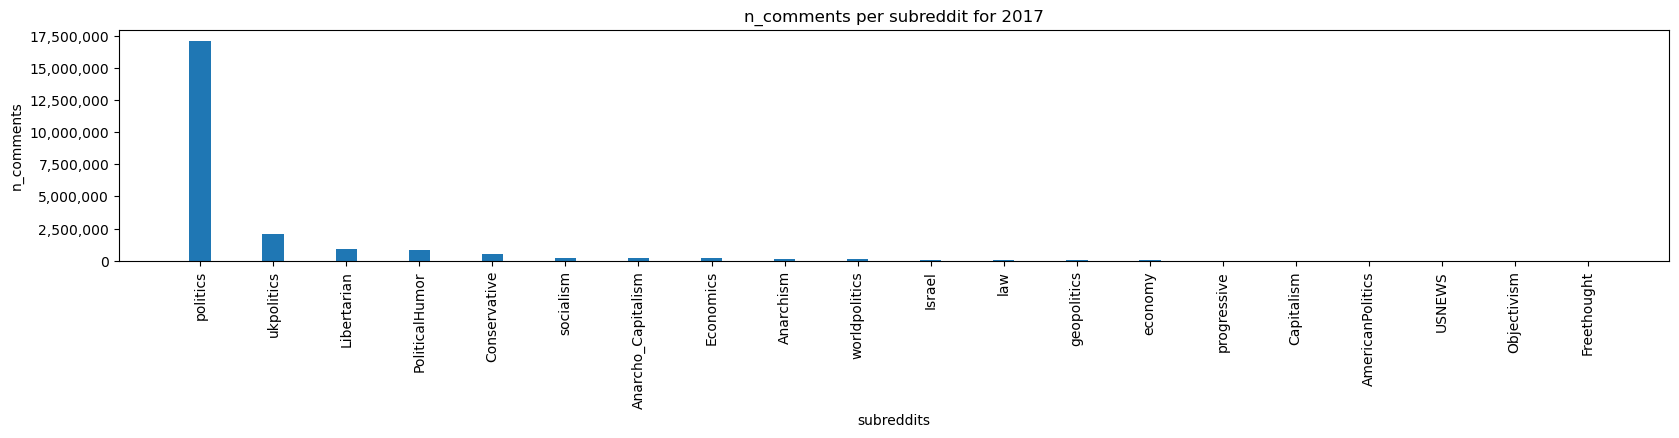

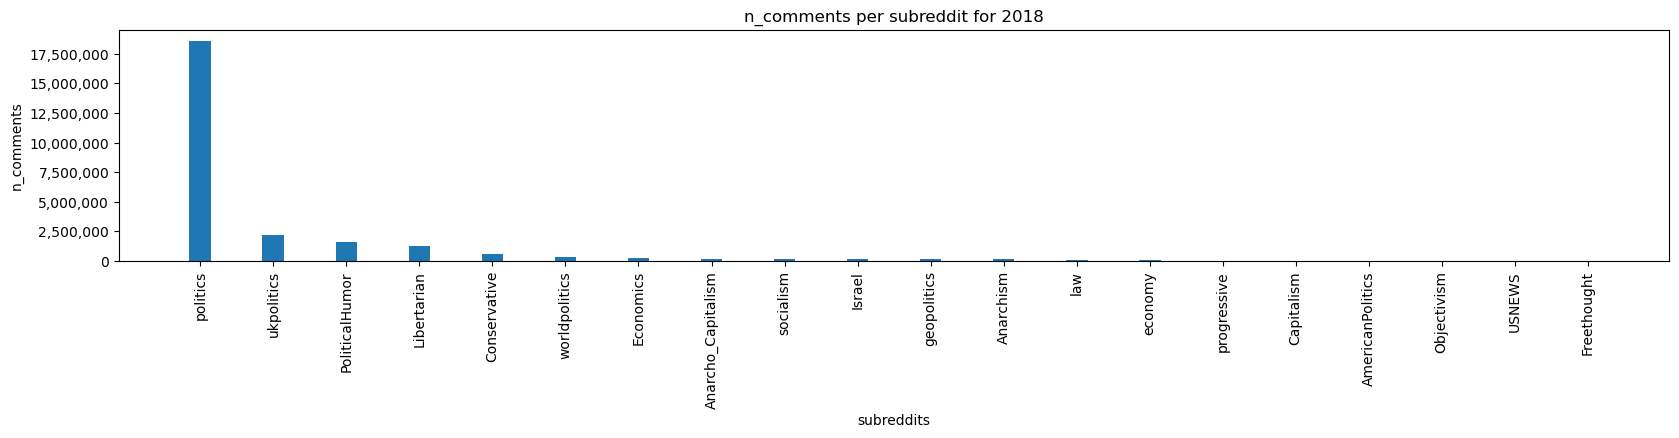

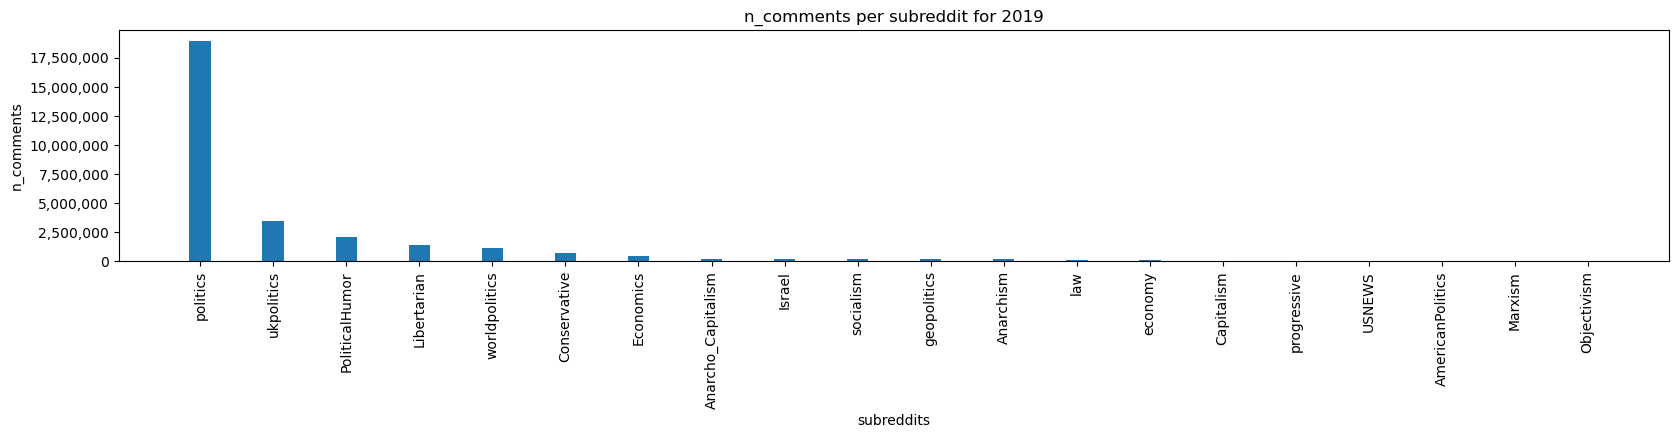

Text(0.5, 1.0, 'n_comments per subreddit total')

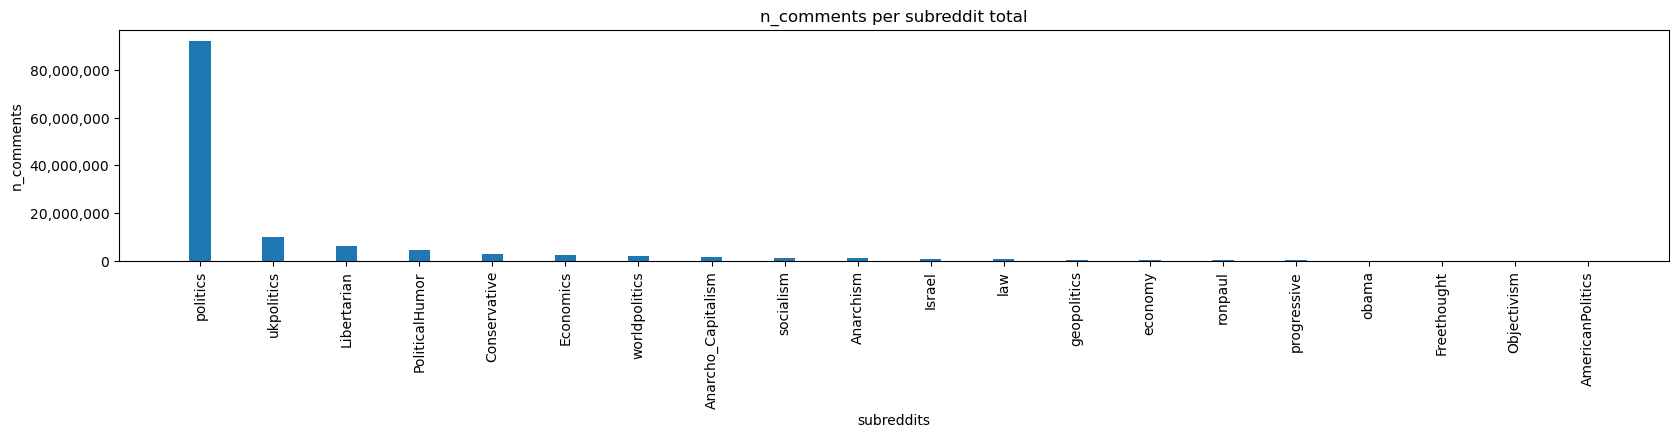

In [7]:
year = 2008
#plot graphs for all years
for df in df_years:
    plt.figure(figsize=(20,3))
    # Plotting a bar graph
    plt.bar(df['subreddit'].head(20), df['n_comments'].head(20), width=0.3)
    
    #change notation to whole number and rotate subreddit names
    plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    plt.xticks(rotation='vertical')

    # Adding labels and title
    plt.xlabel('subreddits')
    plt.ylabel('n_comments')
    plt.title(f'n_comments per subreddit for {year}')

    # Display the plot
    plt.show()
    year += 1

#plot graphs over all years
plt.figure(figsize=(20,3))
# Plotting a bar graph
plt.bar(df_total['subreddit'].head(20), df_total['n_comments'].head(20), width=0.3)

#change notation to whole number and rotate subreddit names
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation='vertical')

# Adding labels and title
plt.xlabel('subreddits')
plt.ylabel('n_comments')
plt.title(f'n_comments per subreddit total')